# Project

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import cv2


#### Observation:
    All needed liberies are imported.

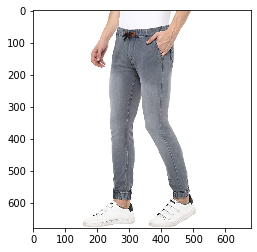

In [4]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/training/jeans/12.jpg')
plt.imshow(img)

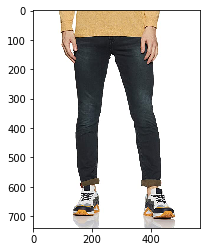

In [5]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/testing/jeans/112.jpg')
plt.imshow(img)

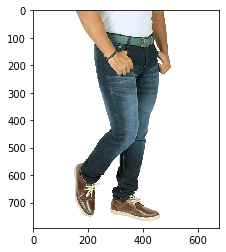

In [7]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/validation/jeans/200.jpg')
plt.imshow(img)

## Observation:
    Plotting jeans image.

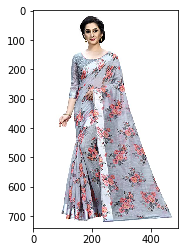

In [8]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/training/sarees/12.jpg')
plt.imshow(img)

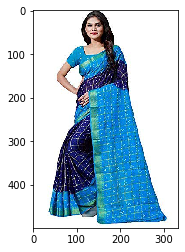

In [9]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/testing/sarees/114.jpg')
plt.imshow(img)

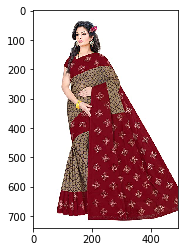

In [10]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/validation/sarees/199.jpg')
plt.imshow(img)

## Observation:
    Plotting saree image.

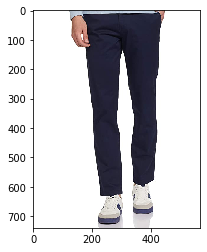

In [37]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/training/trousers/12.jpg')
plt.imshow(img)

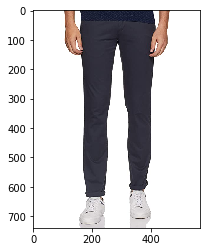

In [11]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/testing/trousers/115.jpg')
plt.imshow(img)

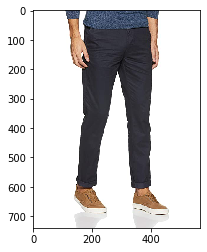

In [12]:
img=image.load_img('C:/Users/MADHU/Desktop/ramya_project8/validation/trousers/198.jpg')
plt.imshow(img)

## Observation:
    Plotting image of Trousers.

In [13]:
cv2.imread('C:/Users/MADHU/Desktop/ramya_project8/testing/jeans/111.jpg').shape

(740, 569, 3)

## Observation:
    shape of image is (740, 569, 3)

In [14]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1./255)

## Observation:
    By rescale we are rescaling images.

In [15]:
train_dataset=train.flow_from_directory('C:/Users/MADHU/Desktop/ramya_project8/training',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='categorical')
validation_dataset=validation.flow_from_directory('C:/Users/MADHU/Desktop/ramya_project8/validation',
                                                 target_size=(200,200),
                                                 batch_size=3,
                                                 class_mode='categorical')

Found 324 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


## Observation:
    Rescaled train and validation data.
    There are 3 classes in our data.

In [16]:
train_dataset.class_indices

{'jeans': 0, 'sarees': 1, 'trousers': 2}

In [17]:
validation_dataset.class_indices

{'jeans': 0, 'sarees': 1, 'trousers': 2}

## Observation:
    Jeans are mapped to '0', sarees mapped to '1' and trousers mapped to '2'

In [18]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
                                ])

## Observation:
    A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd', metrics=['accuracy'])

## Observation:
    When you finish writing the statements in a model, you can use COMPILE to compile the model. During compilation, COMPILE checks for format errors, so you can use COMPILE to help debug your code before running a model.

In [20]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

## Observation:
    By this we can observe summary of data.

In [36]:
#fitting our model with training and vadilation datasets
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=55,
                   validation_data=validation_dataset,
                   validation_steps=3)

Epoch 1/55
3/3 [==============================] - 1s 275ms/step - loss: 0.2536 - accuracy: 0.8889 - val_loss: 0.3686 - val_accuracy: 0.8889
Epoch 2/55
3/3 [==============================] - 1s 281ms/step - loss: 0.2264 - accuracy: 0.8889 - val_loss: 0.1653 - val_accuracy: 1.0000
Epoch 3/55
3/3 [==============================] - 1s 274ms/step - loss: 0.1953 - accuracy: 1.0000 - val_loss: 0.2618 - val_accuracy: 0.7778
Epoch 4/55
3/3 [==============================] - 1s 282ms/step - loss: 0.2426 - accuracy: 1.0000 - val_loss: 0.1677 - val_accuracy: 0.8889
Epoch 5/55
3/3 [==============================] - 1s 280ms/step - loss: 0.6289 - accuracy: 0.7778 - val_loss: 0.3200 - val_accuracy: 0.8889
Epoch 6/55
3/3 [==============================] - 1s 288ms/step - loss: 0.1376 - accuracy: 0.8889 - val_loss: 0.9279 - val_accuracy: 0.5556
Epoch 7/55
3/3 [==============================] - 1s 274ms/step - loss: 0.3139 - accuracy: 0.8889 - val_loss: 0.2971 - val_accuracy: 0.7778
Epoch 8/55
3/3 [====

## Observation:
    From above we can assume that our model is well fitted.And accuray score is near to 80%.

In [28]:
test=ImageDataGenerator(rescale=1./255)

In [29]:
test_dataset=test.flow_from_directory('C:/Users/MADHU/Desktop/ramya_project8/testing',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='categorical')

Found 216 images belonging to 3 classes.


## Observation:
    There are total 216 images in our test dataset and are rescaled.

In [38]:
evaluate = model.evaluate(test_dataset)
print(evaluate)

72/72 [==============================] - 3s 38ms/step - loss: 0.4821 - accuracy: 0.7824
[0.4821465015411377, 0.7824074029922485]


## Observtion:
    Our model is working well and fitted with 78% accuracy score.